# Backtesting ML Classification-Based

In [ ]:
???

![](src/res_classification.png)

## Load the model

In [1]:
import pickle

In [7]:
with open('models/test.pkl', 'rb') as f:
    model_dt = pickle.load(f)

In [8]:
model_dt

DecisionTreeClassifier(max_depth=20)

## Load the data

In [9]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', index_col=0, parse_dates=['Date'])
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,1.549143,UP
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.321692,UP
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100,1.286112,UP
2016-12-13,57.427836,58.273172,57.188938,57.868881,35718900,-0.478622,DOWN
2016-12-14,57.887258,58.300739,57.455399,57.593227,30352700,-0.159789,DOWN
...,...,...,...,...,...,...,...
2023-03-09,255.820007,259.559998,251.580002,252.320007,26653400,-1.500467,DOWN
2023-03-10,251.080002,252.789993,247.600006,248.589996,28321800,2.099087,UP
2023-03-13,247.399994,257.910004,245.729996,253.919998,33339700,2.634307,UP


## Backtesting.py Library

### Create your Strategy Class

In [11]:
from backtesting import Backtest, Strategy
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,1.549143,UP
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.321692,UP
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100,1.286112,UP
2016-12-13,57.427836,58.273172,57.188938,57.868881,35718900,-0.478622,DOWN
2016-12-14,57.887258,58.300739,57.455399,57.593227,30352700,-0.159789,DOWN
...,...,...,...,...,...,...,...
2023-03-09,255.820007,259.559998,251.580002,252.320007,26653400,-1.500467,DOWN
2023-03-10,251.080002,252.789993,247.600006,248.589996,28321800,2.099087,UP
2023-03-13,247.399994,257.910004,245.729996,253.919998,33339700,2.634307,UP


In [ ]:
Backtest(???)

#### Simulate the prediction for the last observation

In [1]:
df_explanatory = df.drop(columns=['change_tomorrow', 'change_tomorrow_direction'])

explanatory_today = df_explanatory.iloc[[-1],:]
forecast_tomorrow = model_dt.predict(X=explanatory_today)[0] # unique value 

NameError: name 'df' is not defined

#### Write the prediction process in the Strategy class

In [40]:
class ClassificationUP(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1],:]
        forecast_tomorrow = model_dt.predict(X=explanatory_today)[0]  # unique value

        if forecast_tomorrow == 'UP' and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == 'DOWN' and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

#### Calculate Purchase Recommendation

##### Buy if it goes up

In [31]:
list_buy_sell = []
for tommorow_direction in df.change_tomorrow_direction:
  if tommorow_direction == 'UP':
    list_buy_sell.append(1)
  elif tommorow_direction == 'DOWN':
    list_buy_sell.append(-1)
df['buy_sell'] = list_buy_sell
df[['change_tomorrow_direction', 'buy_sell']].head(10)

,change_tomorrow_direction,buy_sell
Date,,
2016-12-08,UP,1
2016-12-09,UP,1
2016-12-12,UP,1
2016-12-13,DOWN,-1
2016-12-14,DOWN,-1
2016-12-15,DOWN,-1
2016-12-16,UP,1
2016-12-19,DOWN,-1
2016-12-20,DOWN,-1


##### Buy if it goes and sell if down

> You can only sell if you have already bought

In [32]:
list_buy_sell = []
already_bought = False
for tommorow_direction in df.change_tomorrow_direction:
  if tommorow_direction == 'UP' and already_bought == False:
    list_buy_sell.append(1)
    already_bought = True
  elif tommorow_direction == 'DOWN' and already_bought == True:
    list_buy_sell.append(-1)
    already_bought = False
  else:
    list_buy_sell.append(0)
df['buy_sell_tracks'] = list_buy_sell
df[['change_tomorrow_direction', 'buy_sell', 'buy_sell_tracks']].head(10)

,change_tomorrow_direction,buy_sell,buy_sell_tracks
Date,,,
2016-12-08,UP,1,1
2016-12-09,UP,1,0
2016-12-12,UP,1,0
2016-12-13,DOWN,-1,-1
2016-12-14,DOWN,-1,0
2016-12-15,DOWN,-1,0
2016-12-16,UP,1,1
2016-12-19,DOWN,-1,-1
2016-12-20,DOWN,-1,0


#### Add conditions to the strategy

### Define initial conditions

In [41]:
bt = Backtest(data = df_explanatory, strategy=ClassificationUP,
              cash=10000, commission=.002, exclusive_orders=True)

In [34]:
df_explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100
2016-12-13,57.427836,58.273172,57.188938,57.868881,35718900
2016-12-14,57.887258,58.300739,57.455399,57.593227,30352700
...,...,...,...,...,...
2023-03-09,255.820007,259.559998,251.580002,252.320007,26653400
2023-03-10,251.080002,252.789993,247.600006,248.589996,28321800
2023-03-13,247.399994,257.910004,245.729996,253.919998,33339700


### Run backtesting

In [42]:
results = bt.run()

### Interpret backtesting results

In [43]:
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2016-12-08 00:00:00
End,2023-03-15 00:00:00
Duration,2288 days 00:00:00
Exposure Time [%],99.746193
Equity Final [$],43112425.13235
Equity Peak [$],43112425.13235
Commissions [$],10957241.337254
Return [%],431024.251323


<Axes: xlabel='Date'>

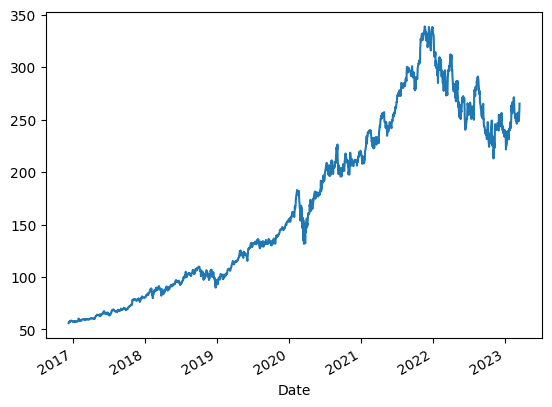

In [39]:
df.Close.plot()

## Practice to master the knowledge

Work on the challenge with another dataset:

1. Learn the <a>mental models</a> to solve the challenge faster.
2. Complete the <a href="03C_Backtesting ML Classification-Based.ipynb">notebook</a>.